# Bin packing algorithm

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from dataclasses import dataclass
from functools import total_ordering
import random

In [100]:
def draw_box(ax, box, background_color='lightblue', edge_color='black',alpha=0.5):
    box = Rectangle(box.origin, box.width, box.height, fc=background_color,ec=edge_color,alpha=alpha)
    ax.add_patch(box)

In [126]:
@total_ordering
@dataclass
class Box:
    width: int
    height: int
    origin: tuple[int, int] = (0,0)

    def coords(self) -> list:
        return [
            self.origin, 
            (self.origin[0] + self.width, self.origin[1]), 
            (self.origin[0], self.origin[1] + self.height),
            (self.origin[0] + self.width, self.origin[1] + self.height)
        ]

    def area(self) -> int:
        return self.width * self.height

    def __eq__(self, other):
        return (self.width == other.width) and (self.height == other.height)

    def __lt__(self, other):
        return self.area() < other.area()

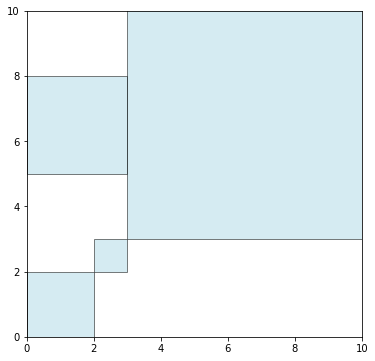

In [101]:
fig, ax = plt.subplots(1,figsize=(6,6))

plt.ylim([0,10])
plt.xlim([0,10])

draw_box(ax, Box(2, 2, (0,0)))
draw_box(ax, Box(1, 1, (2,2)))
draw_box(ax, Box(3, 3, (0,5)))
draw_box(ax, Box(10, 10, (3,3)))

plt.show()

In [78]:
a = Box(width=1, height=40)
b = Box(width=7, height=1, origin=(2,2))
a > b

True

In [138]:
box_dims = [[1,1] for _ in range(50)]
boxes = [Box(d[0], d[1]) for d in box_dims]

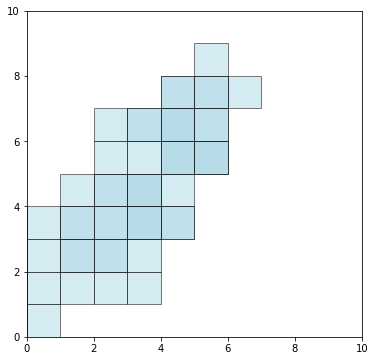

In [157]:
fig, ax = plt.subplots(1,figsize=(6,6))

container_width = 10
container_height = 10

plt.ylim([0,container_height])
plt.xlim([0,container_width])

vertices = [(0,0)]

for b in boxes:
    index = random.randint(0,len(vertices)-1)
    b.origin = vertices[index]
    vertices.pop(index)
    vertices += b.coords()[1:]
    draw_box(ax, b)

plt.show()

In [1]:
boxes[0].coords()

NameError: name 'boxes' is not defined